# Python Bindings Playground

## Set Up the Environment

In [1]:
import sys
import subprocess
from pathlib import Path

if sys.prefix == sys.base_prefix:
    raise Exception("This notebook should be run inside a virtual environment")

In [2]:
!maturin develop --release

🔗 Found pyo3 bindings with abi3 support for Python ≥ 3.6
🐍 Not using a specific python interpreter (With abi3, an interpreter is only required on windows)
    Finished release [optimized] target(s) in 0.05s


In [3]:
status = subprocess.run(["git", "rev-parse", "--show-toplevel"], stdout=subprocess.PIPE, check=True)

RUNE_PROJECT_ROOT = Path(status.stdout.decode("utf-8").strip())
EXAMPLE_DIR = RUNE_PROJECT_ROOT / "examples"

## Fast Fourier Transform

In [4]:
from proc_blocks import Fft
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import math

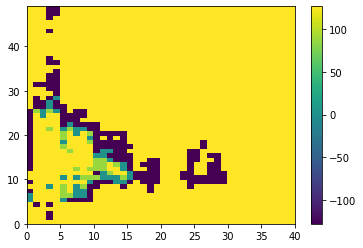

In [23]:
no = EXAMPLE_DIR / "microspeech" / "data" / "no_b66f4f93_nohash_8.wav"
samplerate, data = wavfile.read(no)

fft = Fft()

fft.sample_rate = samplerate
fft.smoothing_bits = 10
fft.even_smoothing = 0.025
fft.odd_smoothing = 0.06
fft.min_signal_remaining = 0.05
fft.strength = 0.95
fft.offset = 80.0
fft.gain_bits = 21

spectrum = fft(data).reshape(49, 40)

fig, axis = plt.subplots() 
heatmap = axis.pcolor(spectrum)
plt.colorbar(heatmap)
plt.show()

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, FloatLogSlider

In [7]:
def render(smoothing_bits, even_smoothing, odd_smoothing):
    fft = Fft()

    fft.sample_rate = samplerate
    fft.smoothing_bits = smoothing_bits
    fft.even_smoothing = even_smoothing
    fft.odd_smoothing = odd_smoothing
    fft.min_signal_remaining = 0.05
    fft.strength = 0.95
    fft.offset = 80.0
    fft.gain_bits = 21

    spectrum = fft(data).reshape(49, 40)

    plt.imshow(spectrum)
    plt.show()
    
interact(
    render, 
    smoothing_bits=IntSlider(min=0, max=16, value=10),
    even_smoothing=FloatLogSlider(min=-2, max=2, value=0),
    odd_smoothing=FloatLogSlider(min=-2, max=2, value=0),
);

interactive(children=(IntSlider(value=10, description='smoothing_bits', max=16), FloatLogSlider(value=0.01, de…

In [9]:
spectrum

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=int8)